In [16]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
%matplotlib inline


In [2]:
import tensorflow as tf
cdc_model = tf.keras.models.load_model('catsdogsclass.model') #loading the model



c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
CATEGORIES = ["Cat","Dog"]


In [4]:
def resize(img_array):
    IMG_SIZE = 50  # 50 in txt-base
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [12]:
imagem = cv2.imread('Cat_in_the_garden.jpg')
H = imagem.shape[0]
C = imagem.shape[1]
dd = [1,2,3,4,5,6,7,8,9,10,11]
lista_final = []
thr = 0.5
for d in dd:
   
    clist =[ C*(j)//d for j in range(int(d)) ]
    hlist =[ H*(i)//d for i in range(int(d)) ]

    lista = []
    for hh in hlist:
        for cc in clist:
            lista.append([cc,hh])
    
    for x0,y0 in lista:
        img_array = imagem[x0:x0+C//d,y0:y0+H//d]
        try:
            new_array = resize(img_array)
            prediction = cdc_model.predict_proba(new_array)
            pts = []
            if (np.max(prediction) > thr) & (np.argmax(prediction)==0):
                pts  = [x0,y0,np.max(prediction)]
                lista_final.append(pts)
            else:
                pass
        except:
            pass
        
x0=[]
y0=[]
prob=[]
for pt in lista_final:  
    x0.append(pt[0])
    y0.append(pt[1])
    prob.append(pt[2])

xmed = np.average(x0)
xstd = np.std(x0)

ymed = np.average(y0)
ystd = np.std(y0)


resultado = [xmed,xstd,ymed,ystd,np.average(prob)]

In [17]:
#save the localization

#pickle_out = open("loc.pickle","wb")
#pickle.dump(resultado, pickle_out)
#pickle_out.close()



In [27]:
#load the result

#pickle_in = open("loc.pickle","rb")
#res = pickle.load(pickle_in)

[[], []]

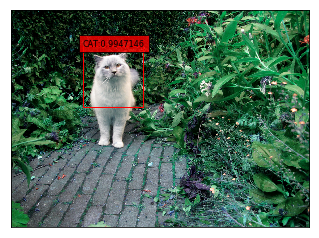

In [36]:
import matplotlib.patches as patches
fig,ax = plt.subplots(1)
res = resultado
# Display the image
ax.imshow(imagem)
raio = (ystd**2 + xstd**2)**0.5
# Create a Rectangle patch

rect = patches.Rectangle((res[0],res[2]),-res[1],-res[3],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
title = 'CAT:'+ str(res[4])
ax.text(x=res[0]-res[1],y=res[2]- res[3],s=title,fontsize=8,bbox=dict(facecolor='red', alpha=0.8))
# Add the patch to the Axes
ax.set(xticks=[], yticks=[])
